# Tutorial of the parameters of the extreme_events function

This notebook tutorial shows the effect of each parameter in the calculation of the storm cycles

In [101]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [102]:
# Juypyter setup

#import matplotlib
#matplotlib.use('nbagg')

%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Import Packages

In [103]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from climate import read
from climate import summary
from climate.stats import extremal

In [104]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 5)
fig_x_size = 20
fig_y_size = 10

## Auxiliar functions

In [105]:
def peaks_plot(data, data_column, cycles, date_ini, date_end, ylimit):
    plt.figure(figsize=(fig_x_size,fig_y_size))
    ax = plt.axes()
    ax.plot(data[data_column])
    ax.axhline(threshold, color='lightgray')

    # Plot cycles
    for cycle in cycles:
        ax.plot(cycle, 'sandybrown', marker='.', markersize=5)
        ax.plot(cycle.index[0], cycle[0], 'gray', marker='.', markersize=10)
        ax.plot(cycle.index[-1], cycle[-1], 'black', marker='.', markersize=10)    

    ax.plot(peaks_over_thres, '.r')
    ax.set_xlim([date_ini, date_end])
    ax.set_ylim(ylimit)

    plt.show()

## Read SIMAR file

In [106]:
data_file = 'SIMAR_1052046'
full_data_path = os.path.join('..', '..', '..', '..', 'data', 'simar')

In [107]:
data_simar, code = read.simar(data_file, path=full_data_path)
data_simar

,Hm0,Tp,DirM,VelV,DirV
AA_MM_DD_HH,,,,,
1958-01-04 00:00:00,2.1,10.8,249.0,7.9,172.0
1958-01-04 01:00:00,2.1,10.6,250.0,7.5,170.0
1958-01-04 02:00:00,2.1,10.6,251.0,7.1,169.0
1958-01-04 03:00:00,2.1,10.6,252.0,6.7,167.0
1958-01-04 04:00:00,2.1,10.6,253.0,6.3,162.0
...,...,...,...,...,...
2017-08-06 20:00:00,0.6,9.7,287.0,4.2,301.0
2017-08-06 21:00:00,0.6,9.7,286.0,4.1,288.0
2017-08-06 22:00:00,0.6,9.7,286.0,3.1,269.0


## Without interpolation and minimum_interarrival_time 3 hours 

In [108]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 hours')
minimum_cycle_length = pd.Timedelta('3 hours')
interpolation=False
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=False
extra_info = False

In [109]:
# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

In [110]:
# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

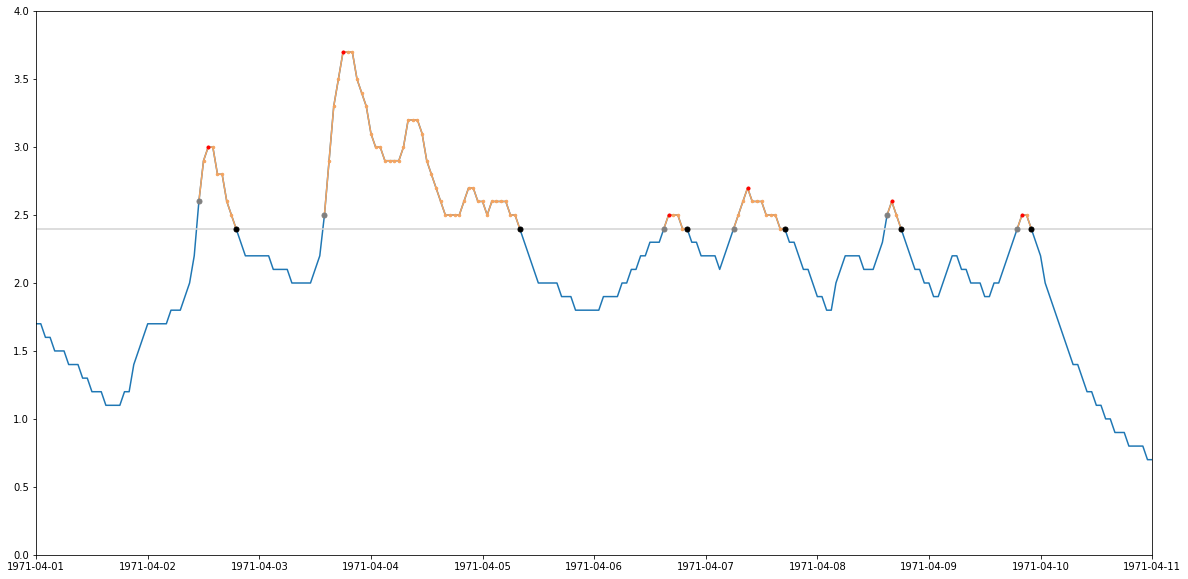

In [111]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1971, 04, 01), date_end=datetime.date(1971, 04, 11), ylimit=[0, 4])

## Without interpolation and minimum_interarrival_time 3 hours and minimum_cycle_length 1 day

In [112]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 hours')
minimum_cycle_length = pd.Timedelta('1 day')
interpolation=False
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=False
extra_info = False

# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

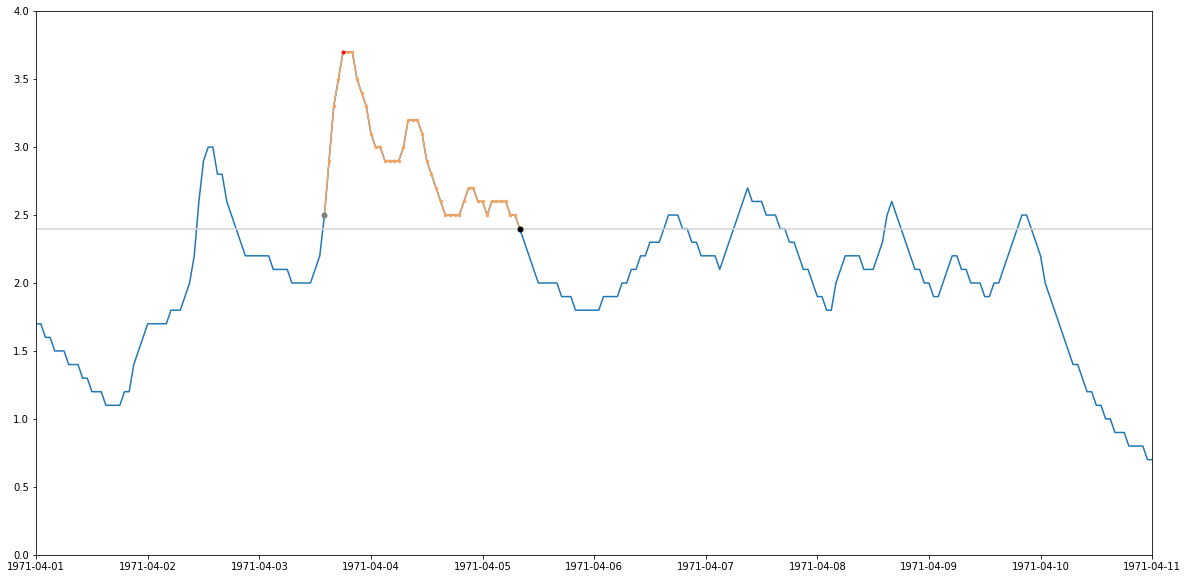

In [113]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1971, 04, 01), date_end=datetime.date(1971, 04, 11), ylimit=[0, 4])

## Without interpolation and minimum_interarrival_time 3 day 

In [114]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 days')
minimum_cycle_length = pd.Timedelta('1 hours')
interpolation=False
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=False
extra_info = False

# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

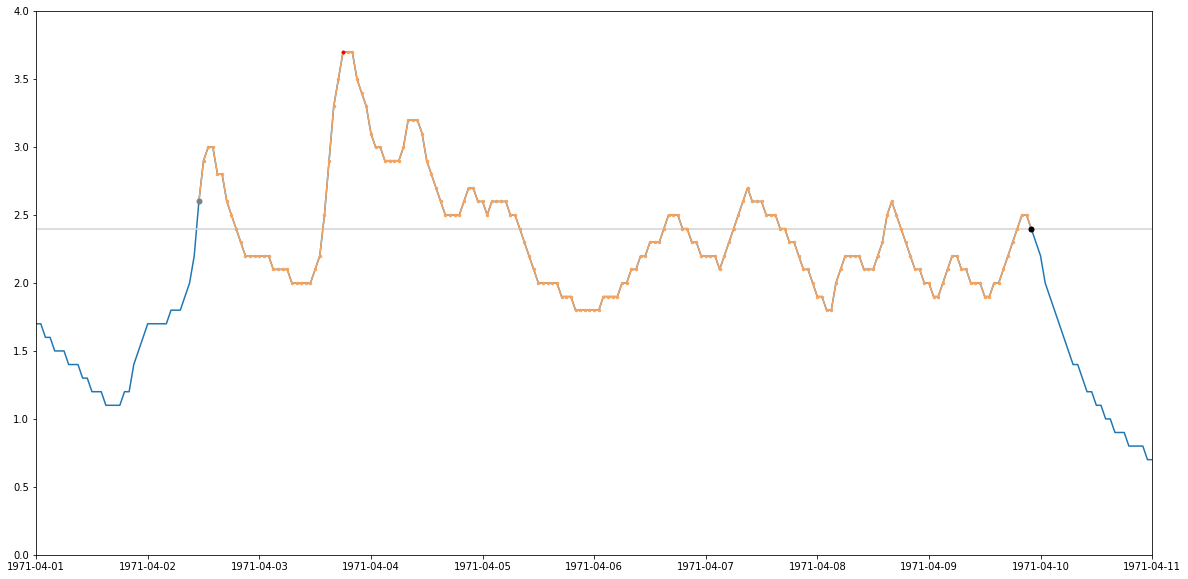

In [115]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1971, 04, 01), date_end=datetime.date(1971, 04, 11), ylimit=[0, 4])

## With interpolation and minimum_interarrival_time 3 hours 

In [116]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 hours')
minimum_cycle_length = pd.Timedelta('3 hours')
interpolation=True
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=False
extra_info = False

# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

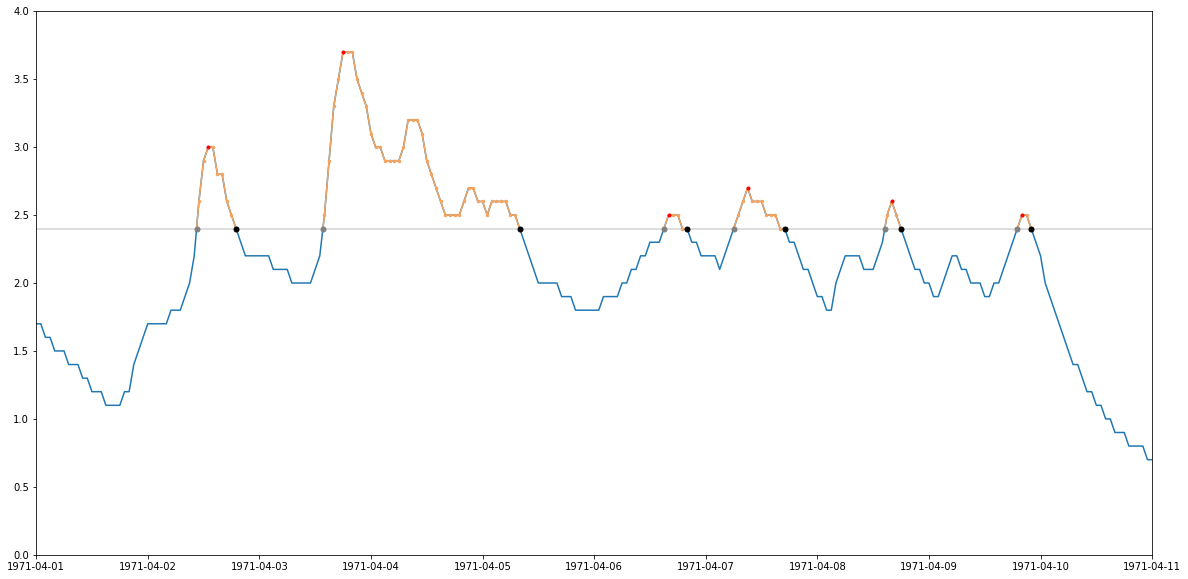

In [117]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1971, 04, 01), date_end=datetime.date(1971, 04, 11), ylimit=[0, 4])

## With interpolation and truncate

In [118]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 days')
minimum_cycle_length = pd.Timedelta('3 hours')
interpolation=True
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=True
extra_info = False

# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

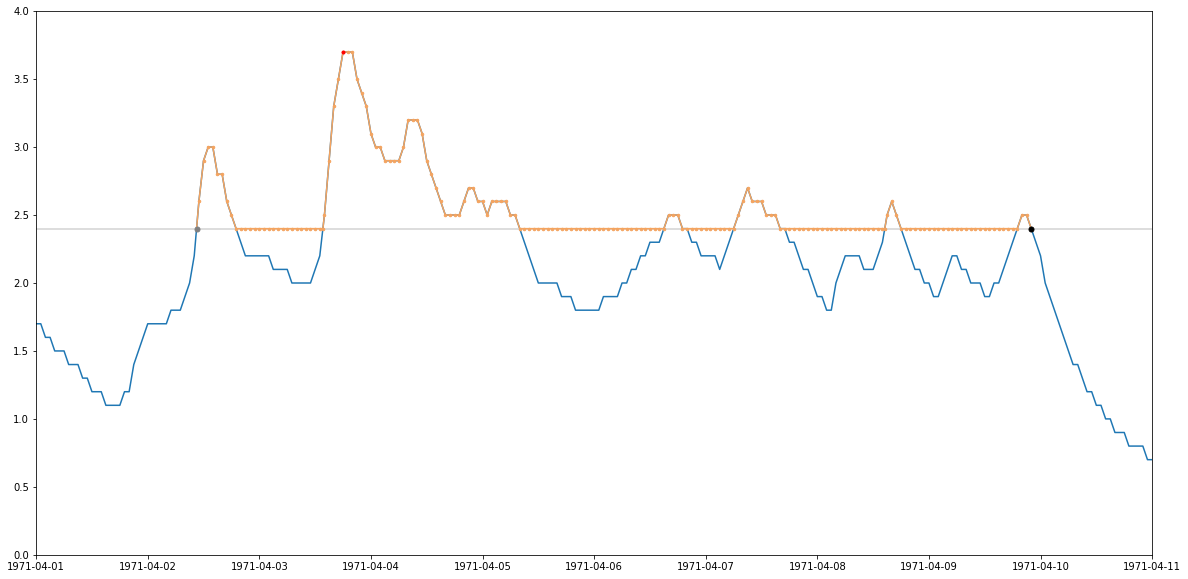

In [119]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1971, 04, 01), date_end=datetime.date(1971, 04, 11), ylimit=[0, 4])

## Cycles calculation for a complete SIMAR

In [120]:
data_column = 'Hm0'
threshold = np.percentile(data_simar[data_column], 95)
minimum_interarrival_time = pd.Timedelta('3 days')
minimum_cycle_length = pd.Timedelta('3 hours')
interpolation=True
interpolation_method = 'linear'
interpolation_freq = '1min'
truncate=False
extra_info = False

# Storm cycles calculation
cycles, calm_periods = extremal.extreme_events(data_simar, data_column, threshold, minimum_interarrival_time,
                                               minimum_cycle_length, interpolation, interpolation_method,
                                               interpolation_freq, truncate, extra_info)

# Peaks over threshold calculations
peaks_over_thres = extremal.events_max(cycles)

In [121]:
# Total number of cycles
len(cycles)

637

In [122]:
# Cycles duration
cycles_duration = extremal.events_duration(cycles)

In [123]:
# Check if the min duration is equal to the set duration threshold
min_cycles_duration = cycles_duration.min()
min_cycles_duration

Timedelta('0 days 03:00:00')

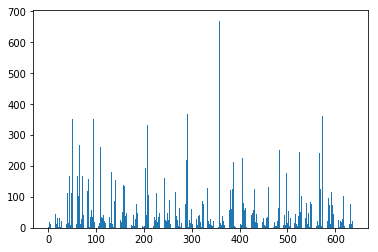

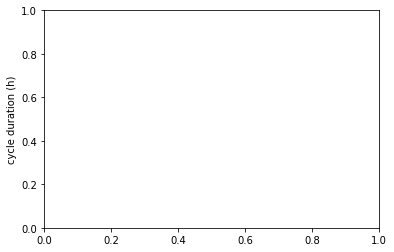

In [124]:
# Representation
N = len(cycles_duration)
x = range(N)
cycles_duration_hours = cycles_duration/np.timedelta64(1, 's')/3600
width = 1/1.5
plt.figure()
plt.bar(x, cycles_duration_hours, width)
plt.show()
plt.ylabel('cycle duration (h)')

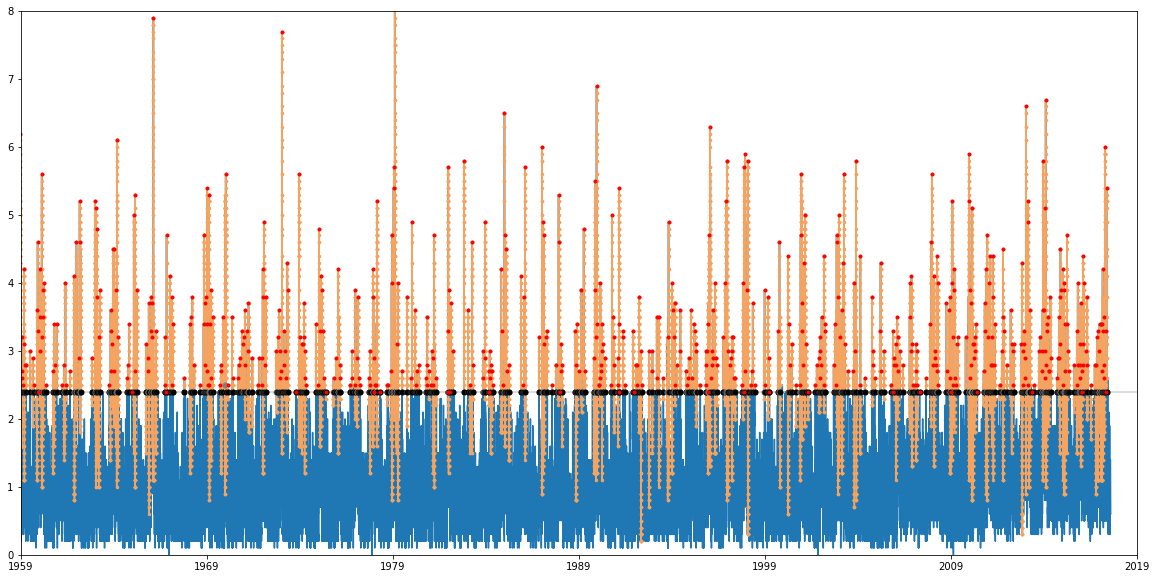

In [125]:
# Plot peaks
peaks_plot(data_simar, data_column, cycles, date_ini=datetime.date(1959, 01, 01), date_end=datetime.date(2019, 01, 01), ylimit=[0, 8])